# Exploratory Data Analysis of a Chess Database
Recreating the data analysis presented in 'exploratory.py' in a jupyter notebook and adding new ideas.
Especially, seeing whether the idea of CP loss alone is enough to make any conclusive opinions about whether a player cheated or not. 


## Data Load-in

In [1]:
## Imports
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats


In [2]:
# Read in the .csv file into a pandas dataframe
df = pd.read_csv('10480_games_with_centipawn_metrics.csv')

## Data Cleaning/Preparation

In [3]:
# Show the first 5 rows
df.head()


,Unnamed: 0,Date,Event Name,Event Rounds,Round,White Name,Black Name,Result,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Evaluations List,White CP Loss List,Black CP Loss List,PGN,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
0,0,3/28/2018,Philadelphia op 12th,9,1,"Niemann, Hans Moke","Oberoi, Shelev",0,2302.0,1924.0,39.0,22.0,46.0,"[47, 43, 44, -9, 17, 10, 5, 0, 12, -30, -13, -...","[4, 53, 7, 5, 42, 38, 0, 13, 135, 0, 0, 5, 0, ...","[1, 26, 0, 12, 17, 10, 19, 14, 35, 12, 10, 11,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
1,0,3/29/2018,Philadelphia op 12th,9,2,"Niemann, Hans Moke","Popilski, Gil",1,2302.0,2502.0,36.0,12.0,13.0,"[46, 36, 46, 35, 50, 36, 62, 47, 59, 38, 57, 5...","[10, 11, 14, 15, 21, 1, 31, 36, 2, 25, 11, 28,...","[10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
2,0,3/29/2018,Philadelphia op 12th,9,3,"Gorovets, Andrey","Niemann, Hans Moke",2,2496.0,2302.0,50.0,46.0,28.0,"[37, 27, 49, 6, 35, 12, 22, 18, 33, 13, 29, 19...","[10, 43, 23, 4, 20, 10, 12, 3, 9, 24, 10, 49, ...","[22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
3,0,3/30/2018,Philadelphia op 12th,9,4,"Tang, Andrew","Niemann, Hans Moke",0,2509.0,2302.0,38.0,22.0,38.0,"[46, 26, 40, 37, 96, 67, 151, 114, 138, 125, 1...","[20, 3, 29, 37, 13, 51, 24, 33, 8, 45, 10, 31,...","[14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN
4,0,3/30/2018,Philadelphia op 12th,9,5,"Niemann, Hans Moke","Balakrishnan, Praveen",2,2302.0,2405.0,39.0,23.0,7.0,"[35, 27, 48, 23, 36, 20, 46, 8, 25, 31, 38, -5...","[8, 25, 16, 38, 0, 92, 6, 0, 1, 2, 0, 7, 0, 30...","[21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20.0,NaN,NaN


In [4]:
# show info about types of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10622 entries, 0 to 10621
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10622 non-null  object 
 1   Date                           10512 non-null  object 
 2   Event Name                     10486 non-null  object 
 3   Event Rounds                   10467 non-null  object 
 4   Round                          10480 non-null  object 
 5   White Name                     10480 non-null  object 
 6   Black Name                     10480 non-null  object 
 7   Result                         10480 non-null  object 
 8   White ELO                      10480 non-null  float64
 9   Black ELO                      10480 non-null  float64
 10  Moves                          10480 non-null  float64
 11  White Av CP Loss               10480 non-null  float64
 12  Black Av CP Loss               10480 non-null 

In [5]:
# Show null values for each column
df.isna().sum()

Unnamed: 0                           0
Date                               110
Event Name                         136
Event Rounds                       155
Round                              142
White Name                         142
Black Name                         142
Result                             142
White ELO                          142
Black ELO                          142
Moves                              142
White Av CP Loss                   142
Black Av CP Loss                   142
Evaluations List                   142
White CP Loss List                 142
Black CP Loss List                 142
PGN                                142
Analysis Depth                     143
White Expected Rating by ACPL    10608
Black Expected Rating by ACPL    10608
dtype: int64

In [6]:
# defining the indexes of df with null values as players
i = df[df['White Name'].isna()].index

In [7]:
# Droping the rows were there is no White players name
df = df.drop(i)

In [8]:
# Correcting the one missing 'Analysis Depth' by hand to 20 
df['Analysis Depth'] = df['Analysis Depth'].fillna(20)
# Estimating the missing event round with the median 
df['Event Rounds'].fillna((df['Event Rounds'].median()), inplace=True)


In [9]:
# again showin NaN values of df
df.isna().sum()

Unnamed: 0                           0
Date                                 0
Event Name                           0
Event Rounds                         0
Round                                0
White Name                           0
Black Name                           0
Result                               0
White ELO                            0
Black ELO                            0
Moves                                0
White Av CP Loss                     0
Black Av CP Loss                     0
Evaluations List                     0
White CP Loss List                   0
Black CP Loss List                   0
PGN                                  0
Analysis Depth                       0
White Expected Rating by ACPL    10466
Black Expected Rating by ACPL    10466
dtype: int64

In [10]:
# dropping 0 columns and columns not containing additinal info
df = df.drop(columns = ['Unnamed: 0', 'PGN', 'White Expected Rating by ACPL', 'Black Expected Rating by ACPL'])
df.head()

,Date,Event Name,Event Rounds,Round,White Name,Black Name,Result,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Evaluations List,White CP Loss List,Black CP Loss List,Analysis Depth
0,3/28/2018,Philadelphia op 12th,9,1,"Niemann, Hans Moke","Oberoi, Shelev",0,2302.0,1924.0,39.0,22.0,46.0,"[47, 43, 44, -9, 17, 10, 5, 0, 12, -30, -13, -...","[4, 53, 7, 5, 42, 38, 0, 13, 135, 0, 0, 5, 0, ...","[1, 26, 0, 12, 17, 10, 19, 14, 35, 12, 10, 11,...",20.0
1,3/29/2018,Philadelphia op 12th,9,2,"Niemann, Hans Moke","Popilski, Gil",1,2302.0,2502.0,36.0,12.0,13.0,"[46, 36, 46, 35, 50, 36, 62, 47, 59, 38, 57, 5...","[10, 11, 14, 15, 21, 1, 31, 36, 2, 25, 11, 28,...","[10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...",20.0
2,3/29/2018,Philadelphia op 12th,9,3,"Gorovets, Andrey","Niemann, Hans Moke",2,2496.0,2302.0,50.0,46.0,28.0,"[37, 27, 49, 6, 35, 12, 22, 18, 33, 13, 29, 19...","[10, 43, 23, 4, 20, 10, 12, 3, 9, 24, 10, 49, ...","[22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...",20.0
3,3/30/2018,Philadelphia op 12th,9,4,"Tang, Andrew","Niemann, Hans Moke",0,2509.0,2302.0,38.0,22.0,38.0,"[46, 26, 40, 37, 96, 67, 151, 114, 138, 125, 1...","[20, 3, 29, 37, 13, 51, 24, 33, 8, 45, 10, 31,...","[14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...",20.0
4,3/30/2018,Philadelphia op 12th,9,5,"Niemann, Hans Moke","Balakrishnan, Praveen",2,2302.0,2405.0,39.0,23.0,7.0,"[35, 27, 48, 23, 36, 20, 46, 8, 25, 31, 38, -5...","[8, 25, 16, 38, 0, 92, 6, 0, 1, 2, 0, 7, 0, 30...","[21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...",20.0


Perfect! The Dataframe `df` is now ready for analysis

## Data Analysis 


In [11]:
# starting by looking at the statistics of the numerical values of df
df.describe()

,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Analysis Depth
count,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000
mean,2534.952863,2526.260878,44.281202,26.839218,28.505725,20.002672
std,215.420060,233.359409,17.928808,16.569915,17.718973,0.073054
min,893.000000,700.000000,0.000000,0.000000,0.000000,20.000000
25%,2439.000000,2430.000000,33.000000,15.000000,15.000000,20.000000
50%,2558.000000,2553.000000,41.000000,23.000000,25.000000,20.000000
75%,2688.000000,2686.000000,54.000000,35.000000,39.000000,20.000000
max,2882.000000,2882.000000,182.000000,458.000000,476.000000,22.000000


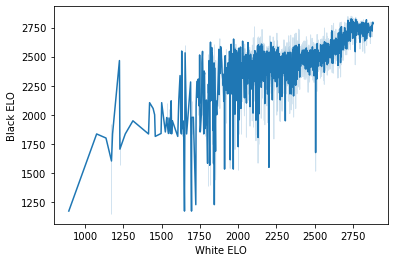

In [12]:
sns.lineplot(data=df, x="White ELO", y="Black ELO")


This graph indicates that there is a correlation between `Black ELO` and `White ELO` which is due to the structure of the ELO system and tournament modes (i.e. swiss) meaning strong players will get paired against strong players

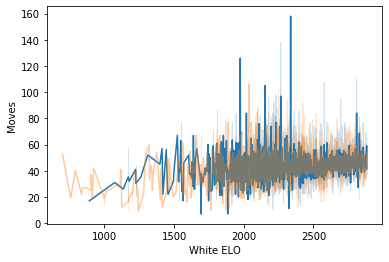

In [13]:
sns.lineplot(data=df, x="White ELO", y="Moves")
sns.lineplot(data=df, x="Black ELO", y="Moves", alpha=0.4)

Seems there is no correlation between playing strength and number of moves 

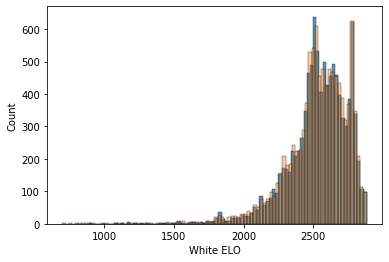

In [14]:
sns.histplot(df['White ELO'])
sns.histplot(df['Black ELO'], alpha=0.4)

From these histogram plots of playing ELO it can be seen that the sample for ELOs below 2300 is very low thereby explaining the high fluctuations in the above line plots. *IDEA:Expand Database to include lower ELO games*

In [15]:
df.columns


Index(['Date', 'Event Name', 'Event Rounds', 'Round', 'White Name',
       'Black Name', 'Result', 'White ELO', 'Black ELO', 'Moves',
       'White Av CP Loss', 'Black Av CP Loss', 'Evaluations List',
       'White CP Loss List', 'Black CP Loss List', 'Analysis Depth'],
      dtype='object')

In [16]:
df_23 = df.copy()
df_23 = df_23[df_23['White ELO'] > 2300]
df_23 = df_23[df_23['Black ELO'] > 2300]


Determining the number of bins and bin widths for using the interface 

In [17]:
# Calculating the IQR-inner quartile range
q3, q1 = np.percentile(df_23['White ELO'], [75 ,25])
iqr = q3-q1
iqr

222.0

#### Freedman–Diaconis rule
$\text{BIN WIDTH} = 2 \frac{iqr}{n^{1/3}}$ , where iqr is the interquartile range of the data an $n$ is the number of observations

In [18]:
bin_width = 2 * iqr / (len(df_23['White ELO']))**(1/3)
bin_width

21.958381403572

In [19]:
bin_number = (max(df_23['White ELO']) - min(df_23['White ELO'])) / bin_width
print (bin_number, bin_width)

26.459145112830942 21.958381403572


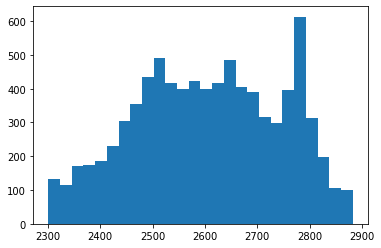

In [20]:
# using matplotlib.pyplots hist -plot to return list of bins 
bins = plt.hist(df_23['White ELO'], bins=int(bin_number))

peak at ELO close to 2800 is due to the fact that super GMs are overrepresented in this database

In [21]:
df_23['Bin_White'] = pd.cut(x=df['White ELO'], bins=bins[1], include_lowest=True).map(lambda x: (x.left+x.right)/2)
df_23['Bin_Black'] = pd.cut(x=df['Black ELO'], bins=bins[1], include_lowest=True).map(lambda x: (x.left+x.right)/2)


Collapsing over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval

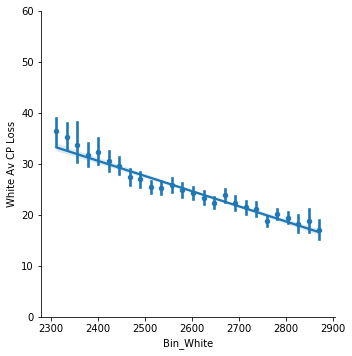

In [22]:
g = sns.lmplot(x='Bin_White', y='White Av CP Loss', x_estimator=np.mean, data=df_23, scatter_kws={'s':20})
g.set(ylim=(0,60))

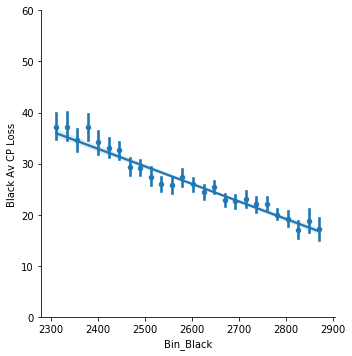

In [23]:
g = sns.lmplot(x='Bin_Black', y='Black Av CP Loss', x_estimator=np.mean, data=df_23, scatter_kws={'s':20})
g.set(ylim=(0,60))

### Calculating statistics of the linearity of ELO and ACPL

In [24]:
r1, p1 = stats.pearsonr(df_23['Bin_Black'], df_23['Black Av CP Loss'])
r2, p2 = stats.pearsonr(df_23['Bin_White'], df_23['White Av CP Loss'])
r1, r2, p1, p2


(-0.311507208324659,
 -0.28604087507723125,
 1.8028259617849952e-185,
 1.9353041936074986e-155)

The pearsonr coefficient r of around -0.3 indicates weak to moderate linear relationship of ELO and ACPL through a shaky linear rule (https://link.springer.com/article/10.1057/jt.2009.5). An Idea of why this is not *more* linear is that higher ELO white players played also against high ELO black players, which are able to increase the difficulty of finding the best moves. 
Lets test this hypothesis!

In [25]:
df['ELO_diff'] = df['White ELO']-df['Black ELO']

In [26]:
acpl_higher = []
acpl_lower = []
for index, row in df.iterrows():
    if row['ELO_diff'] >= 0:
        acpl_higher.append(row['White Av CP Loss'])
        acpl_lower.append(row['Black Av CP Loss'])
    elif row['ELO_diff'] < 0:
        acpl_lower.append(row['White Av CP Loss'])
        acpl_higher.append(row['Black Av CP Loss'])

In [27]:
print(f'The average CP loss of the higher rated player was {np.round(np.mean(acpl_higher),2)}, while the lower rated player had a CP loss of {np.round(np.mean(acpl_lower),2)}') 


The average CP loss of the higher rated player was 24.55, while the lower rated player had a CP loss of 30.79


In [28]:
df['ACPL Lower'] = acpl_lower
df['ACPL Higher'] = acpl_higher 

Now lets look at the distribution of ELO difference and average centipawn loss

AttributeError: 'AxesSubplot' object has no attribute 'add_title'

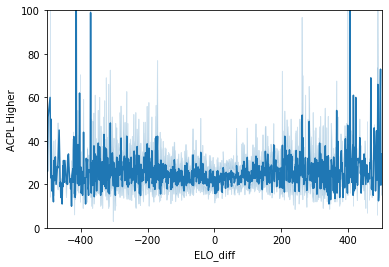

In [83]:
g = sns.lineplot(data=df, x='ELO_diff', y='ACPL Higher')
g.set(ylim=(0, 100), xlim=(-500, 500))
g.set_title('Higher Rated Player')

Text(0.5, 1.0, 'Weaker Player')

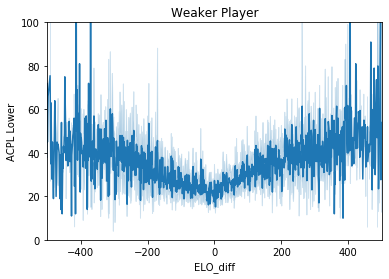

In [84]:
g = sns.lineplot(data=df, x='ELO_diff', y='ACPL Lower')
g.set(ylim=(0, 100), xlim=(-500, 500))
g.set_title('Lower Rated Player')

Interestingly, one can observe that in the case of the lower rated player the ELO difference matters much more than for the higher ELO playerm, who seems to have more or less the same accuracy whether playing against a player with similiar ELO or a weaker player.  

## Analysis of the Centipawn Loss distributions
#### Standard Deviation of CP Loss

In [64]:
black_acpl = df_23['Black CP Loss List']
white_acpl = df_23['White CP Loss List']

In [65]:
black_acpl

1        [10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...
2        [22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...
3        [14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...
4        [21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...
11       [14, 14, 9, 10, 44, 0, 31, 27, 12, 34, 36, 25,...
                               ...                        
10617    [13, 40, 11, 16, 9, 9, 0, 4, 7, 10, 1, 10, 0, ...
10618    [0, 13, 0, 0, 9, 10, 8, 39, 21, 6, 4, 6, 0, 0,...
10619    [0, 1, 22, 7, 18, 9, 9, 3, 0, 6, 7, 15, 13, 75...
10620    [13, 36, 15, 7, 0, 0, 10, 21, 11, 15, 0, 8, 2,...
10621    [0, 1, 0, 1, 18, 0, 31, 15, 13, 30, 0, 46, 19,...
Name: Black CP Loss List, Length: 8267, dtype: object

In [66]:
import json
std_black = []
std_white = []
for i in black_acpl:
    std_black.append(np.std(np.asarray(json.loads(i))))
for i in white_acpl:
    std_white.append(np.std(np.asarray(json.loads(i))))

In [67]:
df_23['Black CP SD'] = std_black
df_23['White CP SD'] = std_white

In [68]:
df.columns

Index(['Date', 'Event Name', 'Event Rounds', 'Round', 'White Name',
       'Black Name', 'Result', 'White ELO', 'Black ELO', 'Moves',
       'White Av CP Loss', 'Black Av CP Loss', 'Evaluations List',
       'White CP Loss List', 'Black CP Loss List', 'Analysis Depth',
       'ELO_diff', 'ACPL Lower', 'ACPL Higher', 'Black CP SD', 'White CP SD'],
      dtype='object')

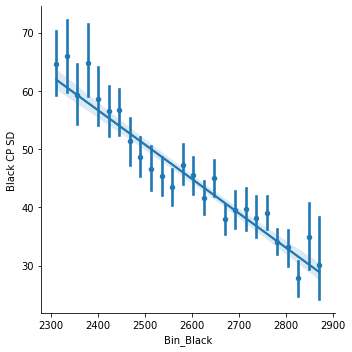

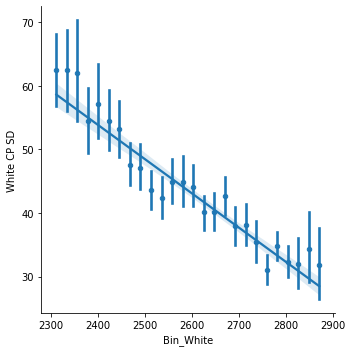

In [71]:
g = sns.lmplot(x='Bin_Black', y='Black CP SD', x_estimator=np.mean, data=df_23, scatter_kws={'s':20})
g = sns.lmplot(x='Bin_White', y='White CP SD', x_estimator=np.mean, data=df_23, scatter_kws={'s':20})

#### Calculating statistics of the linearity of ELO and ACPL

In [70]:
r1, p1 = stats.pearsonr(df_23['Bin_Black'], df_23['Black CP SD'])
r2, p2 = stats.pearsonr(df_23['Bin_White'], df_23['White CP SD'])
r1, r2, p1, p2

(-0.2404657739481419,
 -0.21884574233447707,
 4.596714040704055e-109,
 3.3125291713320146e-90)

#### Plotting Average CP loss against its standard deviation

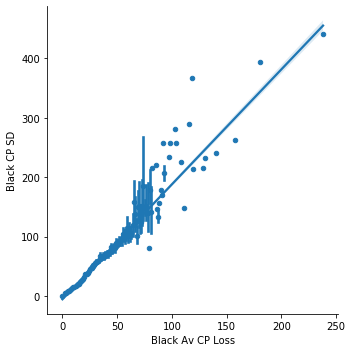

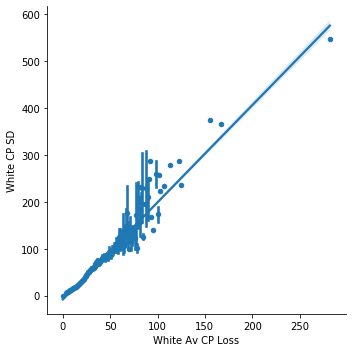

In [75]:
g = sns.lmplot(x='Black Av CP Loss', y='Black CP SD', x_estimator=np.mean, data=df_23, scatter_kws={'s':20})
g = sns.lmplot(x='White Av CP Loss', y='White CP SD', x_estimator=np.mean, data=df_23, scatter_kws={'s':20})

#### Statistic of Average CP loss against its standard deviation

In [81]:
r1, p1 = stats.pearsonr(df_23['Black Av CP Loss'], df_23['Black CP SD'])
r2, p2 = stats.pearsonr(df_23['White Av CP Loss'], df_23['White CP SD'])
r1, r2, p1, p2

(0.8693936053900908, 0.8740543061259439, 0.0, 0.0)

The pearsonr coefficient is indicating a strong correlation between SD of CP Loss and the average CP loss.
